<a href="https://colab.research.google.com/github/aiseongjun/Hands-On-Machine-Learning/blob/main/4_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. 모델 훈련**

# **4.1 선형 회귀**

**선형 모델**
```
일반적으로 선형 모델은 입력 특성의 가중치 합과 편향(또는 절편)이라는 상수를 더해 예측을 만듭니다.
이 식은 벡터 형태로 더 간단하게 쓸 수 있습니다.
```
$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdot\cdot\cdot + \theta_nx_n$$
* $\hat{y}$은 예측값입니다.
* $n$은 특성입니다.
* $x_i$는 $i$번째 특성값입니다.
* $\theta_j$는 $j$번째 모델 파라미터입니다.
$$\hat{y} = h_\theta(x) = \theta\cdot x$$
* $h_\theta$는 모델 파라미터 $\theta$를 사용한 가설 함수입니다.
* $\theta$는 편향과 $\theta_0$과 $\theta_1$에서 $\theta_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터입니다.
* $x$는 $x_0$에서 $x_n$까지 담은 샘플의 **특성 벡터**입니다. $x_0$은 항상 1입니다.
* $\theta\cdot x$는 벡터 $\theta$와 $x$의 점곱입니다.

**평균 제곱 오차(MSE)**
```
평균 제곱 오차는 주로 회귀 분석에서 모델의 성능을 평가할 때 사용되는 지표입니다.
MSE는 모델이 예측한 값과 실제 값 간의 차이를 제곱하여 평균을 낸 값으로, 모델의 예측 오류를 나타냅니다.

+ 좋은 성능 지표
학습 알고리즘은 종종 최종 모델을 평가하는 데 사용되는 성능 지표와 다른 손실 함수를 훈련 중에 최적화합니다.
이는 일반적으로 해당 함수가 최적화하기 더 쉽거나 훈련 중에만 필요한 추가 항이 있기 때문입니다.
좋은 성능 지표는 최종 비즈니스 목표에 가장 근접한 것입니다.
좋은 훈련 손실은 최적화하기 쉽고 지표와 밀접한 상관관계가 있습니다.
```
$$MSE(X, h_0) = \frac{1}{m}\sum^{m}_{i=1}(\theta^{T}x^{(i)}-y^{(i)})^2$$

## **4.1.1 정규 방정식**

**정규 방정식**
```
정규방정식은 선형 회귀에서 비용 함수를 최소화하는 회귀 계수를 구하기 위한 방법입니다.
특히, 선형 회귀 모델에서 최소 제곱법을 사용하여 모델의 파라미터를 계산할 때 사용됩니다.

+ 유사 역행렬
유사역행렬은 역행렬이 존재하지 않는 경우에도 행렬의 역행렬과 유사한 역할을 할 수 있는 개념입니다.
직선 회귀에서 유용하게 사용되며, 주로 최소제곱법을 해결할 때 쓰입니다.
```
$$\hat{\theta} = (X^{T}X)^{-1}X^{T}y$$
* $\hat{\theta}$은 비용 함수를 최소화하는 $\theta$ 값입니다.
* $y$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터입니다.

$$\hat{\theta} = X^{+}y$$
* $X^{+}$는 $X$의 유사 역행렬입니다.

In [1]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature

np.random.seed(42)                    # 동일하게 재현되도록 하기 위해 지정합니다.
m = 100                               # 샘플 개수
X = 2 * np.random.rand(m, 1)          # 열 벡터
y = 4 + 3 * X + np.random.randn(m, 1) # 타깃 값

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best



array([[4.21509616],
       [2.77011339]])

**정규 방정식 결과**
```
기대한 4와 3에 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못했습니다.
데이터셋이 작고 잡음이 많을수록 정확한 값을 얻기 힘듭니다.
```

In [2]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # 각 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

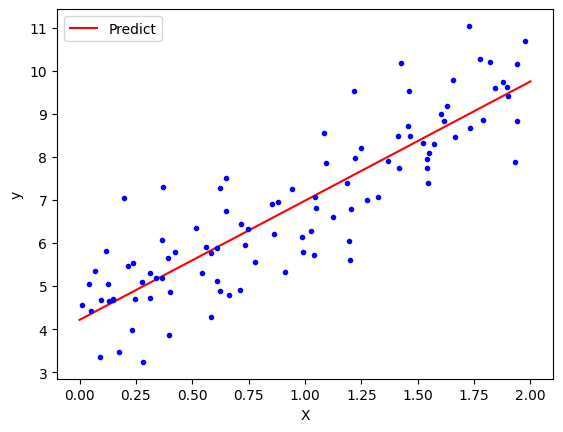

In [3]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-', label='Predict')
plt.plot(X, y, 'b.')
plt.ylabel('y')
plt.xlabel('X')
plt.legend(loc='best')

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X, y)
print('Intercept_: \t{}'.format(lin_reg.intercept_))
print('Coef_: \t\t{}'.format(lin_reg.coef_))
print('Predict: \n{}'.format(lin_reg.predict(X_new)))

Intercept_: 	[4.21509616]
Coef_: 		[[2.77011339]]
Predict: 
[[4.21509616]
 [9.75532293]]


In [5]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [6]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## **4.1.2 계산 복잡도**

**계산 복잡도**
```
정규 방정식은 (n+1) x (n+1) 크기의 역행렬을 계산합니다.
역행렬을 계산하는 계산 복잡도는 일반적으로 n^2.4에서 n^3 사이입니다.
사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 n^2입니다.
특성의 개수가 두 배로 늘어나면 계산 시간은 대략 4배가 됩니다.
```

# **4.2 경사 하강법**

**경사 하강법**
```
경사하강법은 함수의 기울기를 계산하여, 그 기울기를 반영해 함수의 값을 최소화하는 방향으로 파라미터를 조정하는 방식입니다.
예를 들어, 비용 함수 또는 손실 함수를 최소화하는 것이 목표일 때, 이 함수를 따라 내려가면서 최적의 파라미터를 찾습니다.

+ 학습률
학습률은 경사하강법과 같은 최적화 알고리즘에서 사용되는 하이퍼파라미터로, 모델 파라미터를 얼마나 크게 업데이트할지를 결정하는 값입니다.

+ 스케일
경사 하강법을 사용할 때는 반드시 모든 특성의 스케일을 같게 만들어야 합니다(예: 사이킷런 StandardScaler를 사용합니다).
그렇지 않으면 수렴하는 데 훨씬 오랜 시간이 걸립니다.
```

## **4.2.1 배치 경사 하강법**

**배치 경사 하강법**
```
배치 경사 하강법은 경사 하강법 알고리즘의 한 종류로, 전체 훈련 데이터를 사용하여 기울기를 계산하고,
그 기울기에 따라 모델의 파라미터를 한 번에 업데이트하는 방식입니다.

+ 편도함수
편도함수는 다변수 함수에서, 한 변수에 대해 나머지 변수들은 고정시킨 채로 해당 변수에 대한 미분을 구한 것입니다.
즉, 여러 개의 독립적인 변수를 가진 함수에서 하나의 변수에 대해서만 미분을 취하는 것입니다.
```
$$\frac{\delta}{\delta\theta_{j}}MSE(\theta) = \frac{2}{m}\sum^{m}_{i=1}(\theta^{T}x^{(i)}-y^{(i)})x^{(i)}_j$$
$$\Delta_{\theta} MSE(\theta) = \frac{2}{m}X^{T}(X\theta-y)$$
$$\theta^{nextstep} = \theta-\eta\Delta_{\theta}MSE(\theta)$$

In [7]:
eta = 0.1    # 학습률
n_epochs = 1000
m = len(X_b) # 샘플 개수

np.random.seed(42)
theta = np.random.randn(2, 1) # 모델 파라미터를 랜덤하게 초기화합니다.

for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

## **4.2.2 확률적 경사 하강법**

**확률적 경사 하강법**
```
확률적 경사 하강법은 경사 하강법의 한 변형으로, 전체 데이터셋 대신 하나의 샘플만을 사용하여 모델의 파라미터를 업데이트하는 방법입니다.
즉, 매번 하나의 데이터 포인트만을 사용해 기울기를 계산하고 파라미터를 업데이트하는 방식입니다.
```

In [8]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # 랜덤 초기화

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T @ (xi @ theta - yi) # SGD의 경우 m으로 나누지 않습니다.
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42).fit(X, y.ravel())
print('sgd_reg.intercept_: \t{}'.format(sgd_reg.intercept_))
print('sgd_reg.coef_: \t\t{}'.format(sgd_reg.coef_))

sgd_reg.intercept_: 	[4.21278812]
sgd_reg.coef_: 		[2.77270267]


## **4.2.3 미니배치 경사 하강법**

**미니배치 경사 하강법**
```
미니배치 경사 하강법은 배치 경사 하강법과 확률적 경사 하강법의 중간 형태로,
훈련 데이터셋을 작은 배치로 나누어 각각에 대해 경사 하강법을 적용하는 방법입니다.
즉, 전체 데이터셋을 사용하지 않고 작은 데이터 조각(미니배치)을 사용하여 기울기를 계산하고 파라미터 업데이트를 진행하는 방식입니다.
```

| 알고리즘 | m이 클 때 | 외부 메모리 학습 지원 | n이 클 때 | 하이퍼 파라미터 수 | 스케일 조정 필요 | 사이킷런 |
|--------|--------|--------|--------|--------|--------|--------|
| 정규 방정식 | 빠름 | No | 느림 | 0 | No | N/A |
| SVD | 빠름 | No | 느림 | 0 | No | LinearRegression |
| 배치 경사 하강법 | 느림 | No | 빠름 | 2 | Yes | N/A |
| 확률적 경사 하강법 | 빠름 | Yes | 빠름 | >= 2 | Yes | SGDRegressor |
| 미니배치 경사 하강법 | 빠름 | Yes | 빠름 | >= 2 | Yes | N/A |

# **4.3 다항 회귀**

**다항 회귀**
```
다항 회귀는 회귀 분석의 한 종류로, 입력 변수와 출력 변수 간의 관계가 선형이 아닌 비선형으로 모델링되는 경우에 사용됩니다.
다항 회귀는 데이터를 비선형 관계로 모델링하여 더 복잡한 형태의 곡선에 맞추어 예측을 할 수 있게 합니다.
```

In [10]:
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
print('X[0]: \t\t{}'.format(X[0]))
print('X_poly[0]: \t{}'.format(X_poly[0]))

X[0]: 		[-0.75275929]
X_poly[0]: 	[-0.75275929  0.56664654]


In [11]:
lin_reg = LinearRegression().fit(X_poly, y)
print('Intercept_: \t{}'.format(lin_reg.intercept_))
print('Coef_: \t\t{}'.format(lin_reg.coef_))

Intercept_: 	[1.78134581]
Coef_: 		[[0.93366893 0.56456263]]


# **4.4 학습 곡선**

**학습 곡선**
```
학습곡선은 모델이 학습하면서 성능이 어떻게 변화하는지를 시각적으로 나타낸 그래프입니다.
주로 훈련 데이터에 대한 성능과 검증 데이터에 대한 성능을 비교하는 방식으로 그려집니다.
학습곡선은 모델이 얼마나 잘 학습하고 있는지, 과적합 또는 과소적합 상태인지 등을 파악하는 데 유용합니다.
```

**편향/분산 트레이드 오프**
```
모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어듭니다.
반대로 모델의 복잡도가 줄어들면 평향이 커지고 분산이 작아집니다.
그래서 트레이드오프라고 부릅니다.
```

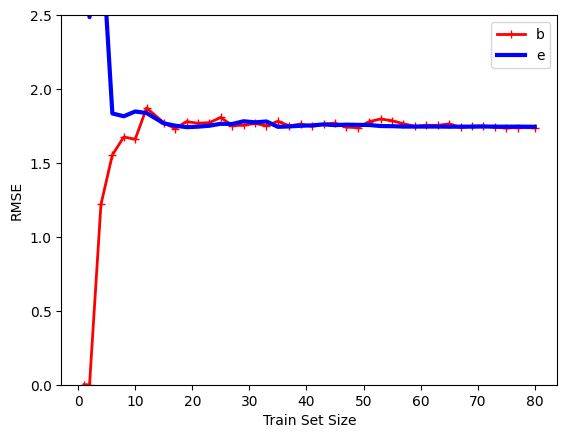

In [12]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train set')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid set')
plt.ylim(0, 2.5)
plt.ylabel('RMSE')
plt.xlabel('Train Set Size')
plt.legend('best')

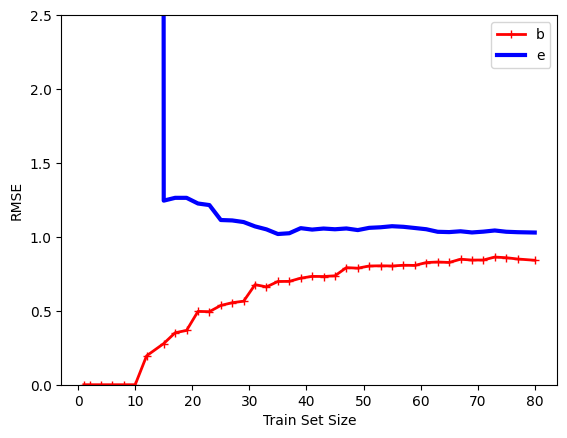

In [13]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train set')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid set')
plt.ylim(0, 2.5)
plt.ylabel('RMSE')
plt.xlabel('Train Set Size')
plt.legend('best')

**학습 곡선 비교 결과**
* 훈련 데이터의 오차가 이전보다 훨씬 낮습니다.
* 두 곡선 사이에 공간이 있습니다. 이 말은 검증 데이터에서보다 훈련 데이터에서 모델이 훨씬 더 나은 성능을 보인다는 뜻으로, 이는 과대적합 모델의 특징입니다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워집니다.

# **4.5 규제가 있는 선형 모델**

**과대적합을 줄이는 방법**
```
과대적합을 줄이는 방법은 모델을 규제하는 것입니다.
자유도를 줄이면 데이터에 과대적합되기 더 어려워집니다.
다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 줄이는 것입니다.
선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가합니다.
```

## **4.5.1 릿지 회귀**

**릿지 회귀**
```
릿지 회귀는 선형 회귀의 일종으로, 과적합을 방지하기 위해 L2 정규화를 적용한 모델입니다.
훈련 데이터가 많고 복잡한 경우, 모델이 학습 데이터에 너무 과하게 맞추는 과적합이 발생할 수 있습니다.
이를 방지하려면 모델의 복잡도를 제어해야 하는데, 릿지 회귀는 이를 해결하기 위해 가중치 파라미터에 패널티를 추가하여 모델의 복잡도를 제어합니다.
```
$$J(\theta) = MSE(\theta) + \frac{\alpha}{m}\sum^{n}_{i=1}\theta^{2}_{i}$$

In [14]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky').fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [15]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42).fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([4.82830117])

## **4.5.2 라쏘 회귀**

**라쏘 회귀**
```
라쏘 회귀는 선형 회귀의 한 종류로, L1 정규화를 적용한 모델입니다.
릿지 회귀와 마찬가지로, 과적합을 방지하기 위해 사용되지만, 정규화 방식이 L1 규제입니다.
L1 규제는 가중치의 절댓값 합을 패널티 항으로 추가하여 가중치가 0이 되도록 유도하는 특성을 가지고 있습니다.
이로 인해 특성 선택이라는 중요한 특성을 가집니다.
```
$$J(\theta) = MSE(\theta) + 2\alpha\sum^{n}_{i=1}|\theta_{i}|$$

In [16]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1).fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

## **4.5.3 엘라스틱넷**

**엘라스틱넷 회귀**
```
엘라스틱넷은 릿지 회귀와 라쏘 회귀의 특성을 결합한 정규화 기법입니다.
즉, L1 정규화와 L2 정규화를 동시에 적용하여, 두 기법의 장점을 모두 취할 수 있도록 만들어졌습니다.
이는 선형 회귀에서 과적합을 방지하고, 특성 선택을 하며, 다중공선성 문제를 해결할 수 있도록 돕습니다.
```
$$J(\theta) = MSE(\theta) + r(2\alpha\sum^{n}_{i=1}|\theta_{i}|) + (1-r)(\frac{\alpha}{m}\sum^{n}_{i=1}\theta^{2}_{i})$$

In [17]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

## **4.5.4 조기 종료**

**조기 종료**
```
조기 종료는 모델 학습 중 과적합을 방지하기 위한 기법으로,
모델의 성능이 더 이상 개선되지 않거나 성능이 오히려 악화되기 시작할 때 학습을 중단하는 방법입니다.
훈련 시간이 길어지거나 과적합이 발생할 가능성이 있을 때 유용합니다.
```

# **4.6 로지스틱 회귀**

**로지스틱 회귀**
```
로지스틱 회귀는 분류 문제를 해결하기 위한 통계적 모델로, 주로 두 가지 클래스를 예측하는 데 사용됩니다.
간단히 말해서, 로지스틱 회귀는 데이터를 기반으로 특정 사건의 발생 확률을 예측합니다.
```

## **4.6.1 확률 추정**

**확률 추정**
```
선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산합니다.
대신 선형 회귀처럼 바로 결과를 출력하지 않고 결과값의 로지스틱을 출력합니다.

+ 로지스틱
로지스틱은 0과 1사이의 값을 출력하는 시그모이드 함수입니다.
```
$$\hat{p} = h_{\theta}(x) = \sigma(\theta^{T}x)$$
$$\sigma(t) = \frac{1}{1+e^{-t}}$$

In [18]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print('list(iris): \n{}'.format(list(iris)))
print('\niris.target_names: \n{}'.format(iris.target_names))
print('\niris.data.head(3): \n{}'.format(iris.data.head(3)))

list(iris): 
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

iris.target_names: 
['setosa' 'versicolor' 'virginica']

iris.data.head(3): 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2


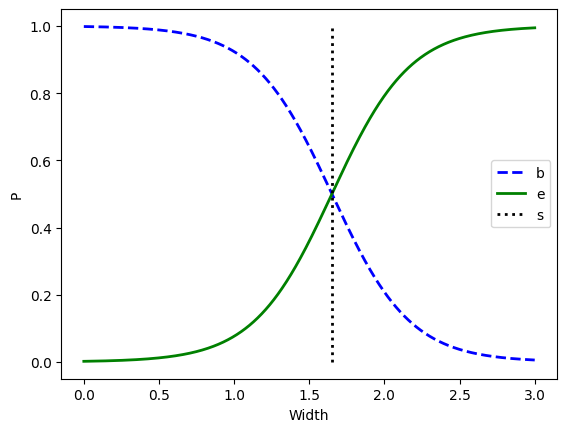

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42).fit(X_train, y_train)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # 열 벡터로 바꿉니다.
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2,
         label='Not Iris-Virginica')
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris-Virginica')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2,
         label='Boundary')
plt.ylabel('P')
plt.xlabel('Width')
plt.legend('best')

In [20]:
print('decision_boundary: {}'.format(decision_boundary))
print('log_reg.predict: \n{}'.format(log_reg.predict([[1.7], [1.5]])))

decision_boundary: 1.6516516516516517
log_reg.predict: 
[ True False]


## **4.6.2 소프트맥스 회귀**

**소프트맥스 회귀**
```
소프트맥스 회귀는 다중 클래스 분류 문제를 해결하기 위한 모델로, 로지스틱 회귀를 확장한 형태입니다.
로지스틱 회귀는 이진 분류 문제에 사용되지만, 소프트맥스 회귀는 여러 개의 클래스를 다룰 수 있는 방법을 제공합니다.
샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정합니다.
```
$$s_{k}(x) = (\theta^{(k)})^{T}x$$
$$\hat{p_{k}} = \sigma(s(x))_{k} = \frac{e^{s_{k}(x)}}{\sum^{K}_{j=1}e^{s_{j}(x)}}$$
* $K$는 클래스 수입니다.
* $s(x)$는 샘플 $x$에 대한 각 클래스의 점수를 담은 벡터입니다.
* $\sigma(s(x))_{k}$는 샘플 $x$에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 $k$에 속할 추정 확률입니다.
$$\hat{y} = argmax_{k}\sigma(s(x))_{k} = argmax_{k}s_{k}(x) = argmax_{k}((\theta^{(k)})^{T}x)$$

**크로스 엔트로피**
```
크로스 엔트로피 비용 함수는 주로 분류 문제에서 모델의 예측과 실제 값 간의 차이를 측정하는 데 사용되는 손실 함수입니다.
분류 문제에서 모델의 출력은 일반적으로 확률로 나타나며, 크로스 엔트로피는 모델이 예측한 확률 분포와 실제 클래스 분포 간의 차이를 계산합니다.
```
$$J(\theta) = -\frac{1}{m}\sum^{m}_{i=1}\sum^{K}_{k=1}y^{(i)}_{k}log(\hat{p}_{k}^{(i)})$$
$$\Delta_{\theta^{(k)}} J(\theta) = \frac{1}{m}\sum^{m}_{i=1}(\hat(p)^{(i)}_{k}-\hat(y)^{(i)}_{k})x^{(i)}$$

In [21]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42).fit(X_train, y_train)
print('softmax_reg.predict: \n{}'.format(softmax_reg.predict([[5, 2]])))
print('softmax_reg.predict_proba: \n{}'.format(softmax_reg.predict_proba([[5, 2]]).round(2)))

softmax_reg.predict: 
[2]
softmax_reg.predict_proba: 
[[0.   0.04 0.96]]
